In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import tensorflow as tf

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [7]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([7963, 2037], dtype=int64))

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [9]:
from sklearn.compose import ColumnTransformer
                                # tipo      #coluna    #preserva as outras colunas
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = ct.fit_transform(X) # Transformar em um matriz, a transformação vai primeira coluna

In [10]:
from imblearn.over_sampling import SMOTE
st = SMOTE(sampling_strategy='minority')
X, y = st.fit_resample(X, y)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [12]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.127229,0.872771,0.000000,715.598076,0.127229,43.544580,8.491084,148833.236041,1.872771,1.000000,0.127229,42091.050547
1,0.000000,1.000000,0.000000,651.000000,1.000000,26.000000,5.000000,147037.320000,1.000000,0.000000,0.000000,141763.260000
2,0.868511,0.131489,0.000000,579.024700,0.000000,58.449786,2.868511,75824.682000,1.000000,0.000000,0.000000,17019.004303
3,1.000000,0.000000,0.000000,432.000000,1.000000,42.000000,9.000000,152603.450000,1.000000,1.000000,0.000000,110265.240000
4,0.045186,0.000000,0.954814,838.793983,0.954814,47.728887,2.361484,0.000000,1.045186,0.954814,0.000000,169447.703449


In [13]:
sc = StandardScaler()
X_train[:,[3, 5, 6, 7, 8, 11]] = sc.fit_transform(X_train[:,[3, 5, 6, 7, 8, 11]])
X_test[:,[3, 5, 6, 7, 8, 11]] = sc.transform(X_test[:,[3, 5, 6, 7, 8, 11]])

In [14]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.127229,0.872771,0.000000,0.728983,0.127229,0.249638,1.289870,1.102526,0.602647,1.000000,0.127229,-1.002518
1,0.000000,1.000000,0.000000,0.026463,1.000000,-1.510191,0.004218,1.073080,-0.828253,0.000000,0.000000,0.716510
2,0.868511,0.131489,0.000000,-0.756287,0.000000,1.744722,-0.780740,-0.094522,-0.828253,0.000000,0.000000,-1.434931
3,1.000000,0.000000,0.000000,-2.355218,1.000000,0.094708,1.477287,1.164343,-0.828253,1.000000,0.000000,0.173270
4,0.045186,0.000000,0.954814,2.068770,0.954814,0.669350,-0.967461,-1.337744,-0.754171,0.954814,0.000000,1.193979


In [15]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.0,0.000000,-0.322386,0.858147,1.429965,-1.468851,-1.337744,-0.363119,0.858147,0.141853,-0.511021
1,1.000000,0.0,0.000000,-2.571804,0.995262,-0.794267,0.363762,0.724618,-0.828253,0.004738,0.000000,-0.584037
2,0.000000,1.0,0.000000,0.156966,1.000000,0.796851,0.740752,0.566662,2.450727,1.000000,1.000000,-0.273535
3,0.401513,0.0,0.598487,0.490887,0.598487,0.456417,0.375271,-1.337744,-0.169976,0.401513,0.401513,-0.261089
4,1.000000,0.0,0.000000,0.144332,0.208399,0.495932,-0.210556,-1.337744,1.767393,1.000000,0.208399,-0.117770


In [16]:
# Criando um modelo sequencial
ann = tf.keras.models.Sequential()

In [17]:
# Adicionando a primeira camada oculta
# - 'units=6': 6 neurônios na camada
# - 'activation="relu"': Função de ativação ReLU para introduzir não-linearidade
# Esta camada terá como entrada o número de features (dimensão das variáveis independentes)
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [18]:
# Adicionando a camada de saída
# - 'units=1': Um único neurônio porque o problema é de classificação binária
# - 'activation="sigmoid"': Retorna um valor entre 0 e 1 (probabilidade)
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [19]:
# Compilando o modelo com o otimizador 'adam', função de perda 'binary_crossentropy' e a métrica de 'accuracy'
ann.compile(
    optimizer = 'adam',  # O otimizador 'adam' é usado para ajustar os pesos do modelo de forma eficiente, considerando gradientes e momento.
    loss = 'binary_crossentropy',  # A função de perda 'binary_crossentropy' é adequada para problemas de classificação binária (dois rótulos: 0 ou 1).
    metrics = ['accuracy']  # 'accuracy' será monitorada durante o treinamento, calculando a proporção de previsões corretas.
)

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [21]:
# Treinando o modelo com os dados de treinamento (X_train e y_train) por 100 épocas e usando lotes de 32 amostras por vez
ann.fit(
    X_train,  # Dados de entrada (features) para o treinamento.
    y_train,  # Rótulos ou valores verdadeiros correspondentes às amostras de X_train.
    batch_size = 32,  # O modelo será treinado usando lotes de 32 amostras por vez.
    epochs = 70  # O modelo será treinado por 100 épocas (iterações completas sobre o conjunto de treinamento).
)

Epoch 1/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - accuracy: 0.5464 - loss: 0.6952
Epoch 2/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.7058 - loss: 0.5934
Epoch 3/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.7326 - loss: 0.5556
Epoch 4/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.7300 - loss: 0.5452
Epoch 5/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.7363 - loss: 0.5364
Epoch 6/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.7316 - loss: 0.5310
Epoch 7/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.7458 - loss: 0.5204
Epoch 8/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.7459 - loss: 0.5161
Epoch 9/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.7530 - loss: 0.5067
Epoch 10/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.7649 - loss: 0.4949
Epoch 11/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.7776 - loss: 0.4835
Epoch 12/70
399/399 ━━━━━━━━━━

In [22]:
bob = np.array([[600,'France', "Male", 40, 3, 60000, 2, 1, 1, 50000]])
bob[:, 2] = le.transform(bob[:, 2])
bob = ct.transform(bob)
bob[:, [0,3,4,5,6,9]] = sc.transform(bob[:, [0,3,4,5,6,9]])
bob = bob.astype(float)
print(ann.predict(bob)>0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[False]]


In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


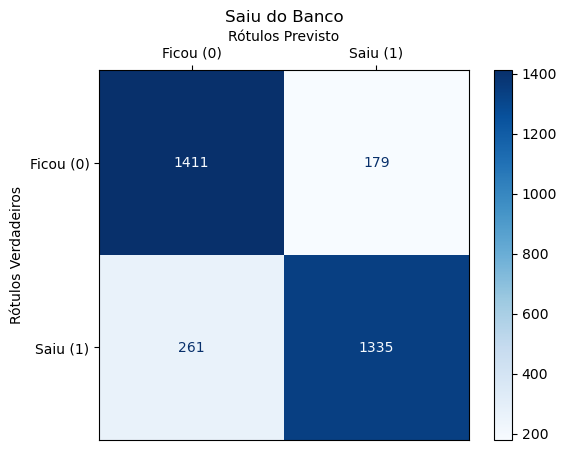

Acurácia: 86.19%


In [24]:
# Define os rótulos que serão exibidos na matriz de confusão
labels = ['Ficou (0)', 'Saiu (1)']

# Cria um objeto de exibição da matriz de confusão usando a matriz 'cm' e os rótulos especificados
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)  # Substitui 0 e 1 pelos rótulos definidos

# Cria uma nova figura e eixo para o gráfico da matriz de confusão
fig, ax = plt.subplots()

# Plota a matriz de confusão com a coloração azul
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Move os rótulos do eixo x para a parte superior do gráfico
ax.xaxis.set_ticks_position('top')  # Coloca os rótulos do eixo x na parte superior
ax.xaxis.set_label_position('top')  # Coloca o rótulo do eixo x na parte superior

# Rotaciona os rótulos do eixo x, se necessário, para melhor legibilidade
plt.xticks(rotation=0)  # Rotaciona os rótulos se necessário

# Define o título e os rótulos dos eixos
plt.title("Saiu do Banco")  # Título do gráfico
plt.xlabel("Rótulos Previsto")  # Rótulo do eixo X em português
plt.ylabel("Rótulos Verdadeiros")  # Rótulo do eixo Y em português

# Exibe o gráfico da matriz de confusão
plt.show()

# Imprime a acurácia do modelo em formato percentual
print(f"Acurácia: {ac:.2%}")